# quick code related to using FITS data

Not part of course, just examining the fits data structure and how to use/plot etc

Filename: data/example_fits_images_mean/image1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       7   (200, 200)   float64   


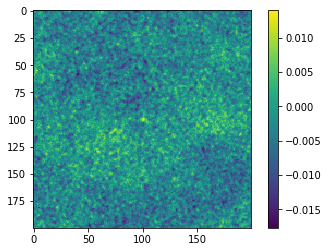

In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

# first bit of data is from the data driven astronomy course week 1 pulsars data
path ="data/example_fits_images_mean/image1.fits" 

# open fits file  
hdulist = fits.open(path)
data = hdulist[0].data

# see general info of the file
hdulist.info()

# sensible to close file once data is set
hdulist.close()


# Plot the 2D image data
plt.imshow(data.T, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()


Filename: C:\Users\gai72996\.astropy\cache\download\py3\2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


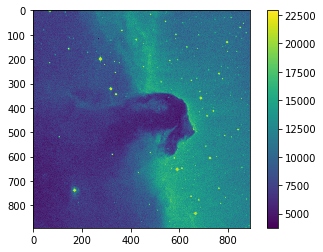

In [8]:
# following sections based on https://learn.astropy.org/FITS-images.html
from astropy.utils.data import download_file
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

hdu_list = fits.open(image_file)
hdu_list.info()

data = hdu_list[0].data

hdu_list.close()

plt.imshow(data)
plt.colorbar()


[Text(1, 0, '5,000'), Text(1, 0, '10,000'), Text(1, 0, '20,000')]

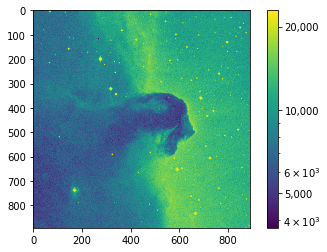

In [10]:
# log scale
plt.imshow(data, norm=LogNorm())
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [11]:
# statistics - just using Numpy functions
print('Min:', np.min(data))
print('Max:', np.max(data))
print('Mean:', np.mean(data))
print('Stdev:', np.std(data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


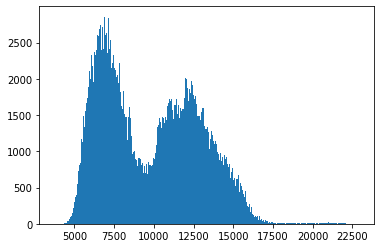

In [12]:
# histogram the data
# need to use np.flattern 
NBINS = 1000
histogram = plt.hist(data.flatten(), NBINS)
# most of data is emptyish space but almost divided into the two halves of the image forming 2 distributions